# Metody inteligencji obliczeniowej w analizie danych

Budowa modelu perceptronu wielowarstwowego (MLP) – sieci neuronowej typu feedforward.

## Bazowa implementacja 

Należy zaimplementować sieć neuronową typu MLP, w której można ustawić:

* liczbę warstw
* liczbę neuronów w każdej z warstw
* wagi poszczególnych połączeń (w tym bias)

Sieć ma używać sigmoidalnej funkcji aktywacji:
$ \sigma(x) = \frac{e^x}{e^x + 1} = \frac{1}{1+e^{-x}}$, a na wyjściu może być funkcja liniowa.

Oprócz tego implementacja musi być przygotowana w taki sposób, żeby łatwo zmienić:

* architekturę (liczba wejść/wyjść, liczba neuronów w warstwach ukrytych)
* funkcję aktywacji

### Działanie

Przykładowo mamy następującą sieć:

![](img/nn_scheme-1.png)

Ma ona:

* dwa wejścia 
* warstwę ukrytą z czterema neuronami
* warstwę ukrytą z trzema neuronami
* dwa wyjścia 


Weźmy input o 100 obserwacjach. Mamy wtedy na wejściu macierz $X^{100 \times 2}$.

Na pierwszej ukrytej warstwie każdy neuron ma po dwa połączenia z wejściem. Te połączenia mają swoje wagi. Wagi wszystkich neuronów w tej warstwie można przedstawić w macierzy $W_1^{4 \times 2}$ (wagi i-tego neuronu są w i-tym wierszu macierzy). Każdy neuron ma też swój bias. Biasy neuronów można zapisać w formie wektora $b_1^{1 \times 4}$. 

Przejście przez warstwę pierwszą można opisać poprzez: 
$$ Z_1 = XW_1^T + b_1  \Longrightarrow  H_1 = f(Z_1),  \text{ gdzie } f \text{ jest funkcją aktywacji w tej warstwie}$$
Wynikowe $H_1$ jest macierzą o rozmiarach $100 \times 4$

Analogicznie przechodzimy przez drugą warstwę i otrzymujemy $H_2^{100 \times 3}$, a potem przez warstwę wyjściową i nasz output to macierz $\hat{Y}^{100 \times 2}$.

### Implementacja

Dokładniej zrobiona jest w pliku _MLP.py_.


W skrócie sieć (klasa _MLP_) działa tak,że:

* tworzy się instancję MLP
* inicjuje się warstwy (klasa _Layer_) ukryte i wyjścia
* w każdej warstwie ustawia się liczbę neuronów, wagi, biasy i funkcję aktywacji
* warstwy dodaje się do instancji MLP metodą _add_ (tu można nadawać im nazwy, kolejność warstw jest taka w jakiej kolejności się je dodaje)
* jeśli ustawiło się wszystko poprawnie można na instancji MLP uruchomić metodę _predict_, sprawia ona, że input przechodzi kolejno przez warstwy używając ich metod _forward_
* jako output otrzymuje się wartości otrzymane z ostatniej warstwy


### Test na danych 

In [1]:
import numpy as np
import pandas as pd
from MLP import *   # zaimportowanie klasy MLP i kilku innych rzeczy

#### 1. square-simple

In [2]:
df_square = pd.read_csv("data/regression/square-simple-training.csv",index_col=0)
df_square_test = pd.read_csv("data/regression/square-simple-test.csv",index_col=0)
df_square.head() 

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


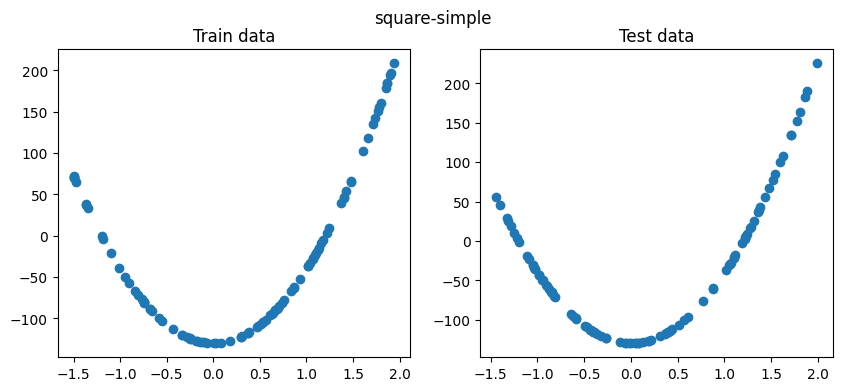

In [3]:
plot_data(title="square-simple",df_test=df_square_test,df_train=df_square)

Widać, że dane pochodzą z funkcji kwadratowej, tak jak mówi ich nazwa. Chcemy wykorzystać naszą sieć w regresji.

##### Sieć z jedną warstwą ukrytą o 5 neuronach

In [4]:
mlp = MLP()

# Two ways of initiating layers in neural network:

#1. initiating a layer with specific number of neurons, and setting the rest afterwards
L0 = Layer(nr_neurons = 5) 
L0.set_weights(np.array([1,1,1,1,1]).reshape(5,1))
L0.set_biases(np.array([2.3, 2, 10, -2, -2.3]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

#2. setting everything when initiating
mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1000, -280, 1, 5, 1360]).reshape(1,5),
    biases = np.array([900]),
    func=linear
    ),name = "Output")

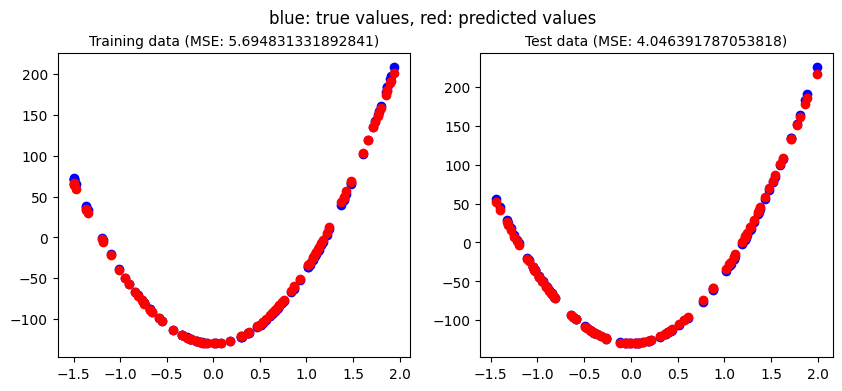

In [5]:
plot_predictions(mlp, df_square, df_square_test)

Na powyższym wykresie są punkty ze zbioru treningowego. Na niebiesko zaznaczone są prawdziwe wartości, a na czerwono te przewidziane przez sieć.


##### Sieć z jedną warstwą ukrytą o 10 neuronach

In [7]:
mlp = MLP()

L0 = Layer(nr_neurons = 10) 
L0.set_weights(np.array([1,1,1,1,1,1,1,1,1,1]).reshape(10,1))
L0.set_biases(np.array([2.3, 2,1,1,10, 10,1,1, -2, -2.3]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1000, -280, 1,1,1,1,1,1, 5, 1360]).reshape(1,10),
    biases = np.array([896]),
    func=linear
    ),name = "Output")

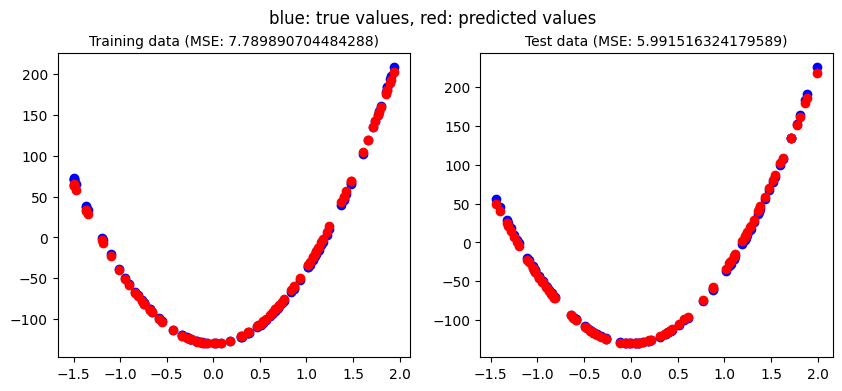

In [8]:
plot_predictions(mlp, df_square, df_square_test)

Można zobaczyć po wartościach wag i biasów, że nie trzeba w tym przypadku dużo zmieniać w porównaniu z poprzednią siecią. Po prostu dodałem jedynki w kilku miejscach, żeby zgadzały się wymiary.

##### Sieć z dwiema warstwami ukrytymi po 5 neruonów

In [9]:
mlp = MLP()


L0 = Layer(nr_neurons = 5) 
L0.set_weights(np.array([-1.2 ,  0.7, -0.03,  1.2 , -1]).reshape(5,1))
L0.set_biases(np.array([-2.25 , -1.6 ,  0.8, -2.8  ,  2.1]))
L0.set_function(sigmoid)
mlp.add(L0,name = "Hidden0")

L1 = Layer(nr_neurons = 5) 
L1.set_weights(np.array([
    [-2.6 , -0.6, -0.2, -1.3 ,  0.7],
    [-0.8 , -2.3 , -0.2, -0.6, -1.5  ],
    [-0.7 , -0.5, -2.4  , -0.9, -0.8],
    [-1.2  , -0.2 ,  0.4, -3  ,  1.2 ],
    [-1 , -0.6 , -0.4 , -1.3 ,  0.02]
]))
L1.set_biases(np.array([ 0.5,  0.2, -0.1,  0.7,  0.6 ]))
L1.set_function(sigmoid)
mlp.add(L1,name = "Hidden1")

mlp.add(Layer(
    nr_neurons = 1,
    weights =  np.array([-1100,-300,-10,-200,-1000]).reshape(1,5),
    biases = np.array([1300]),
    func=linear
    ),name = "Output")


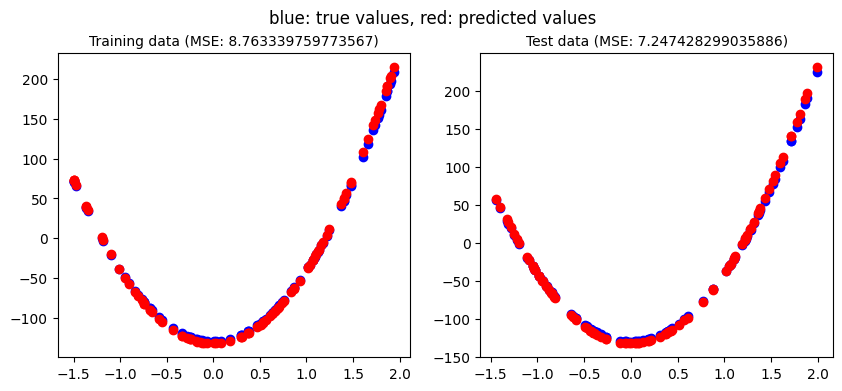

In [10]:
plot_predictions(mlp, df_square, df_square_test)

Tutaj dopasowywanie wag i biasów ręcznie jest dużo bardziej skomplikowane, ponieważ jest dużo więcej parametrów., ale widać, że sieć da się dopasować się do danych.

#### 2. steps-large 

In [11]:
df_steps = pd.read_csv("data/regression/steps-large-training.csv",index_col=0)
df_steps_test = pd.read_csv("data/regression/steps-large-test.csv",index_col=0)
df_steps.head() 

,x,y
1,-1.481354,-80
2,1.033264,80
3,-0.076403,0
4,-1.419785,-80
5,-0.108398,0


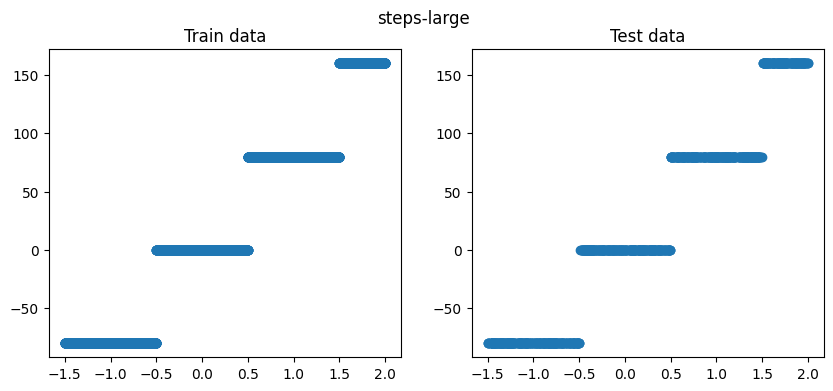

In [12]:
plot_data(title="steps-large",df_train = df_steps, df_test = df_steps_test)

Wartości zbioru to takie schody. 

##### Jedna warstwa ukryta o 5 neuronach


In [13]:
mlp = MLP()


L0 = Layer(nr_neurons=5)
L0.set_weights(np.array([ 20000000, 25000000, 40000000 , 0, 0]).reshape(5,1))
L0.set_biases([-30000000, -12500000, 20000000, 0,  0])
L0.set_function(sigmoid)
mlp.add(L0,name="Hidden0")


L1 = Layer(nr_neurons=1)
L1.set_weights(np.array([ 80,80,80,0,0]).reshape(1,5))
L1.set_biases([-80])
L1.set_function(linear)
mlp.add(L1, name="Output")


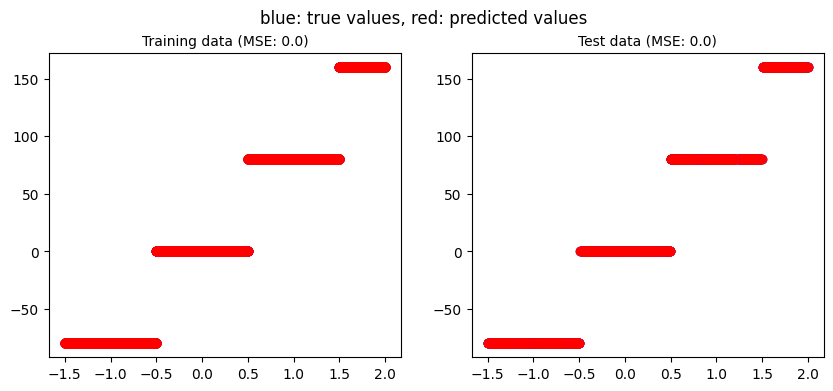

In [14]:
plot_predictions(mlp=mlp,df_train=df_steps,df_test=df_steps_test)

Tutaj sieć udało się dopasować idealnie, używając bardzo dużych wartości, aby skoki były jak "najszybsze" (chodzi o to, aby nie przewidywało wartości pomiędzy skokami).

##### Jedna warstwa ukryta o 10 neuronach


In [15]:
mlp = MLP()


L0 = Layer(nr_neurons=10)
L0.set_weights(np.array([ 20000000, 25000000, 40000000 , 0, 0, 0, 0, 0, 0,0]).reshape(10,1))
L0.set_biases([-30000000, -12500000, 20000000, 0,  0,0 , 0, 0, 0, 0])
L0.set_function(sigmoid)
mlp.add(L0,name="Hidden0")


L1 = Layer(nr_neurons=1)
L1.set_weights(np.array([ 80,80,80,0,0,0,0,0,0,0]).reshape(1,10))
L1.set_biases([-80])
L1.set_function(linear)
mlp.add(L1, name="Output")


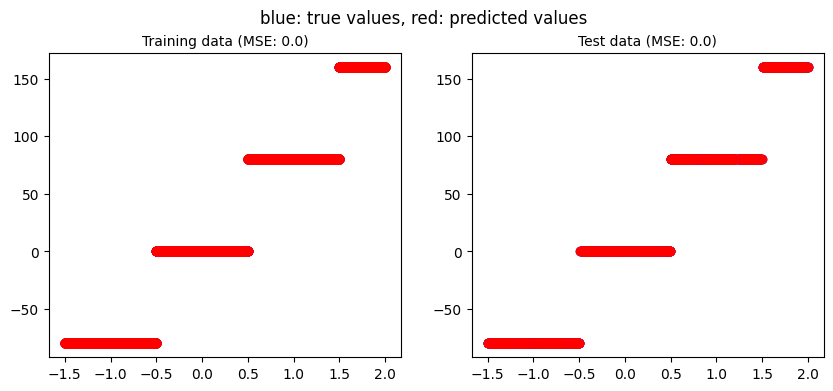

In [16]:
plot_predictions(mlp=mlp,df_train=df_steps,df_test=df_steps_test)

##### Dwie warstwy ukryte po 10 neuronów


In [17]:
mlp = MLP()


L0 = Layer(nr_neurons=5)
L0.set_weights(np.array([ 20000000, 25000000, 40000000, 0, 0]).reshape(5,1))
L0.set_biases([-30000000, -12500000, 20000000, 0, 0])
L0.set_function(sigmoid)
mlp.add(L0,name="Hidden0")


L1 = Layer(nr_neurons=5)
L1.set_weights(np.array([ 
    [20000000, 1, 1, -30, -30],
    [25000000, 1, 1, 10, -15],
    [40000000, 1, 1, 2, 0.7],
    [0, 0, 0, 6.6, 0],
    [0, 0, 0, 8.7, 8.2]
]).T)
L1.set_biases([-30000000, -10000000, 20000000, 0, -0.1])
L1.set_function(sigmoid)
mlp.add(L1,name="Hidden1")


L2 = Layer(nr_neurons=1)
L2.set_weights(np.array([ 80,80,120,-80, -80]).reshape(1,5))
L2.set_biases([-40])
L2.set_function(linear)
mlp.add(L2, name="Output")


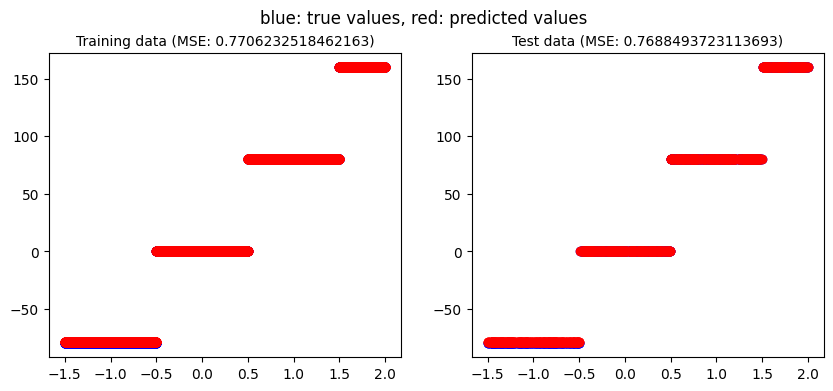

In [18]:
plot_predictions(mlp=mlp,df_train=df_steps,df_test=df_steps_test)

Ogólne przemyślenia do tej pory są takie, że nie jest tak trudno zgadnąć niezłe wagi dla niewielkich sieci, szczególnie dla sieci o jednej warstwie z pięcioma neuronami. Im bardziej skomplikowana sieć tym trudniej się połapać jaki wpływ mają poszczególne parametry.

## Propagacja wsteczna błędu

Należy zaimplementować:

1. uczenie sieci neuronowej propagacją wsteczną błędu, inicjalizacja wagi z rozkładu jednostajnego na przedziale [0,1]
2. metodę wizualizacji wartości wag sieci w kolejnych iteracjach 
3. wersję z aktualizacją wag po prezentacji wszystkich wzorców i wersję z aktualizacją po prezentacji kolejnych porcji (batch). Porównać szybkość uczenia dla każdego z wariantów.


In [81]:
import seaborn as sns
from MLP import *  
df_train = pd.read_csv("data/regression/square-simple-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/square-simple-test.csv",index_col=0)
df_train.head()

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


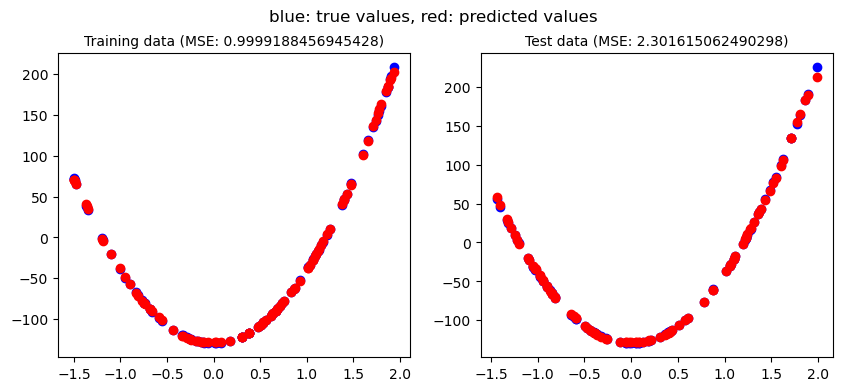

In [82]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[50])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=20000, learning_rate=0.01, batch_size=-1, loss_stop=1)
plot_predictions(mlp, df_train, df_test)

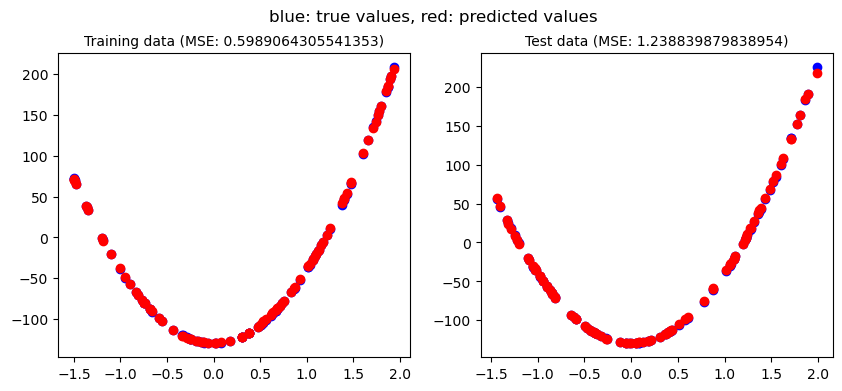

In [83]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[50])
time2, mse2, epochs2 =  mlp.fit(df_train["x"],df_train["y"], epochs=20000, learning_rate=0.01, batch_size=1,loss_stop=1)
plot_predictions(mlp, df_train, df_test)

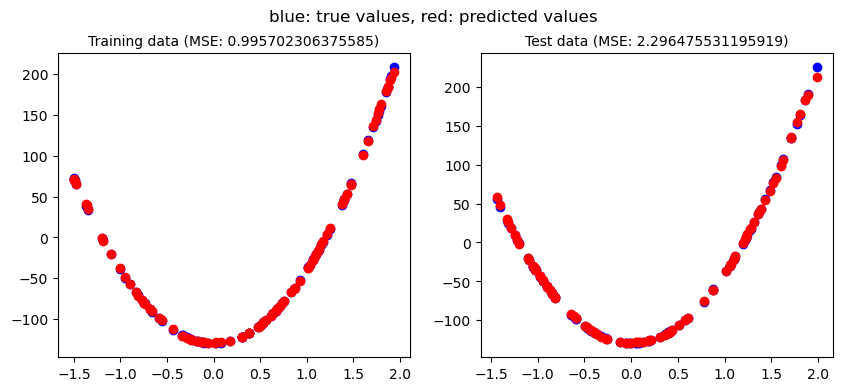

In [84]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[50])
time3, mse3, epochs3 =  mlp.fit(df_train["x"],df_train["y"], epochs=20000, learning_rate=0.01, batch_size=16,loss_stop=1)
plot_predictions(mlp, df_train, df_test)


Text(0.5, 1.0, 'MSE evolution')

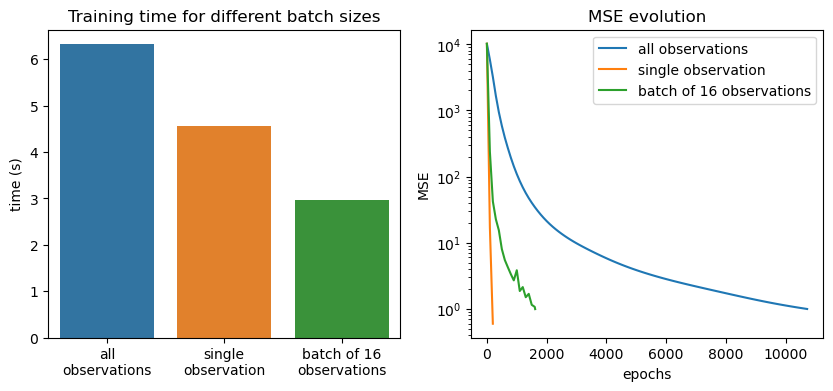

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
batch_size = 16

labels = ["all observations","single observation",f"batch of {batch_size} observations"]

axes[0] = sns.barplot(x=["all\nobservations", "single\nobservation",f"batch of {batch_size}\nobservations"],y=[time1,time2,time3], ax=axes[0])
axes[0].set_title("Training time for different batch sizes")
axes[0].set_ylabel("time (s)")

axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse1)-1)*100+1,100),[epochs1]]),y=mse1,label="all observations") 
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse2)-1)*100+1,100),[epochs2]]),y=mse2,label="single observation")
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse3)-1)*100+1,100),[epochs3]]),y=np.array(mse3),label=f"batch of {batch_size} observations")
axes[1].set_yscale("log")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("MSE")
axes[1].set_title("MSE evolution")



In [99]:
df_train = pd.read_csv("data/regression/steps-small-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/steps-small-test.csv",index_col=0)
df_train.head()


,x,y
1,1.786896,160
2,1.189037,80
3,-0.917923,-80
4,-0.518967,-80
5,-0.011570,0


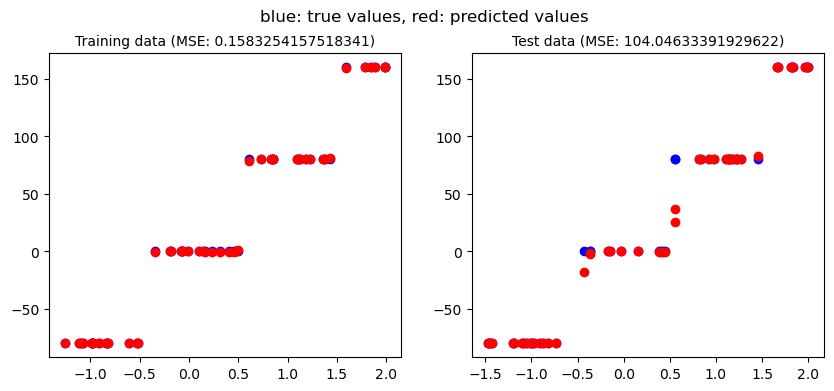

In [100]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.01, batch_size=-1, loss_stop=0.1)
plot_predictions(mlp, df_train, df_test)

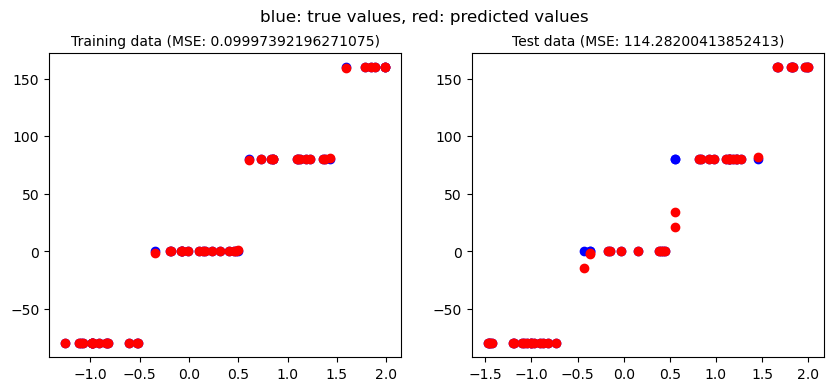

In [88]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time2, mse2, epochs2 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.001, batch_size=1,  loss_stop=0.1)

plot_predictions(mlp, df_train, df_test)

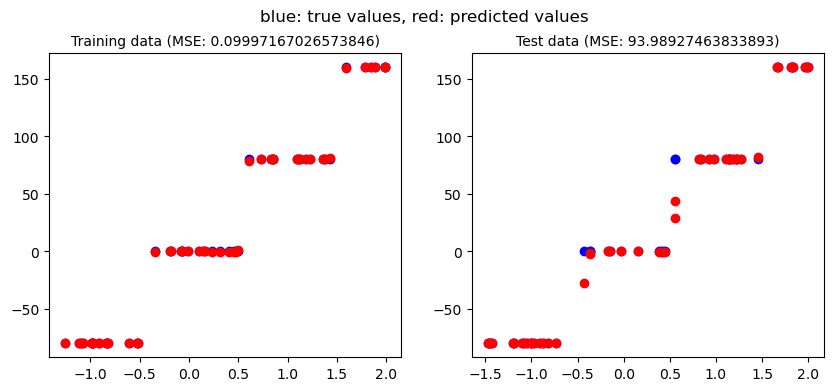

In [89]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time3, mse3, epochs3 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.01, batch_size=16,  loss_stop=0.1)

plot_predictions(mlp, df_train, df_test)

Text(0.5, 1.0, 'MSE evolution')

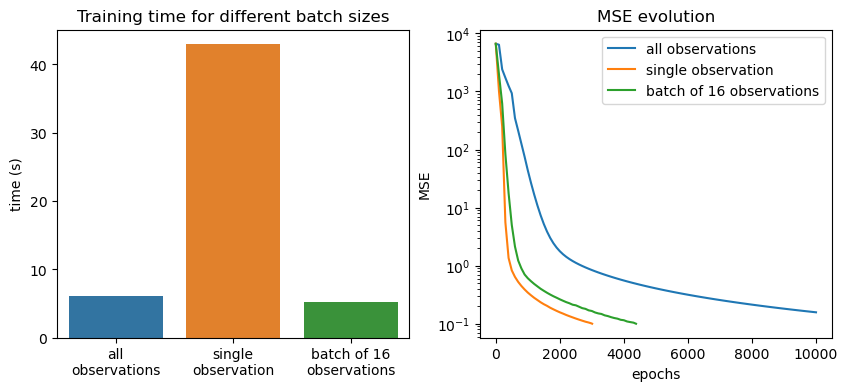

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
batch_size = 16

labels = ["all observations","single observation",f"batch of {batch_size} observations"]

axes[0] = sns.barplot(x=["all\nobservations", "single\nobservation",f"batch of {batch_size}\nobservations"],y=[time1,time2,time3], ax=axes[0])
axes[0].set_title("Training time for different batch sizes")
axes[0].set_ylabel("time (s)")

axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse1)-1)*100+1,100),[epochs1]]),y=mse1,label="all observations") 
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse2)-1)*100+1,100),[epochs2]]),y=mse2,label="single observation")
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse3)-1)*100+1,100),[epochs3]]),y=np.array(mse3),label=f"batch of {batch_size} observations")
axes[1].set_yscale("log")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("MSE")
axes[1].set_title("MSE evolution")

In [91]:
df_train = pd.read_csv("data/regression/multimodal-large-training.csv")
df_test = pd.read_csv("data/regression/multimodal-large-test.csv")
df_train.head()

,x,y
0,-0.685726,-74.197483
1,-0.879898,-30.504177
2,1.411932,10.754122
3,1.688954,100.248297
4,-0.573238,-73.832310


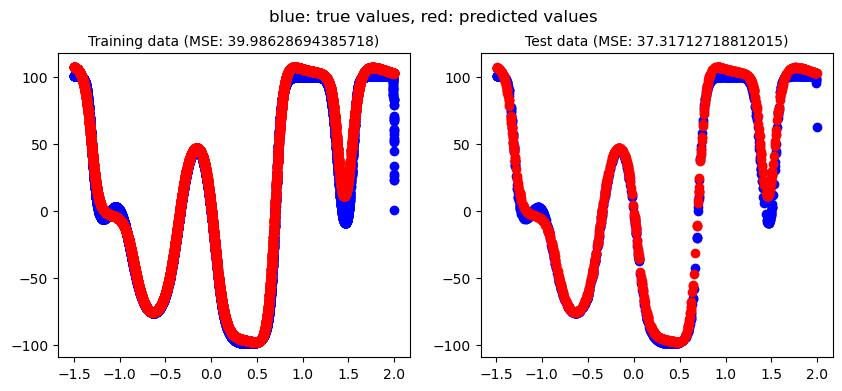

In [92]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=100000, learning_rate=0.05, batch_size=-1, loss_stop=40)

plot_predictions(mlp, df_train, df_test)

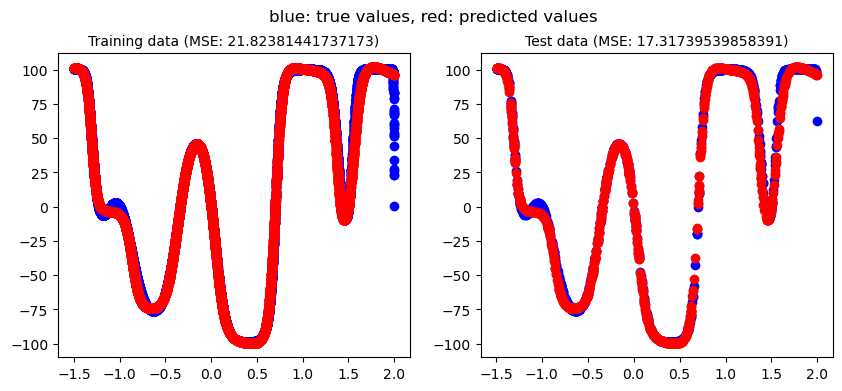

In [93]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100])
time2, mse2, epochs2 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.005, batch_size=1, loss_stop=40)

plot_predictions(mlp, df_train, df_test)

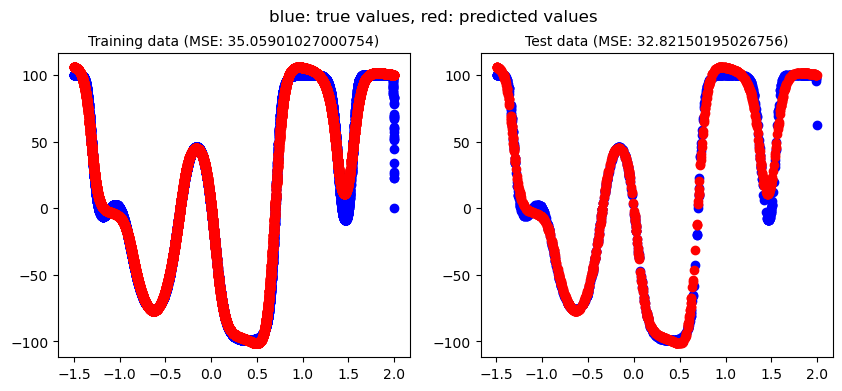

In [94]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100])
time3, mse3, epochs3 =  mlp.fit(df_train["x"],df_train["y"], epochs=100000, learning_rate=0.05, batch_size=256, loss_stop=40)

plot_predictions(mlp, df_train, df_test)

Text(0.5, 1.0, 'MSE evolution')

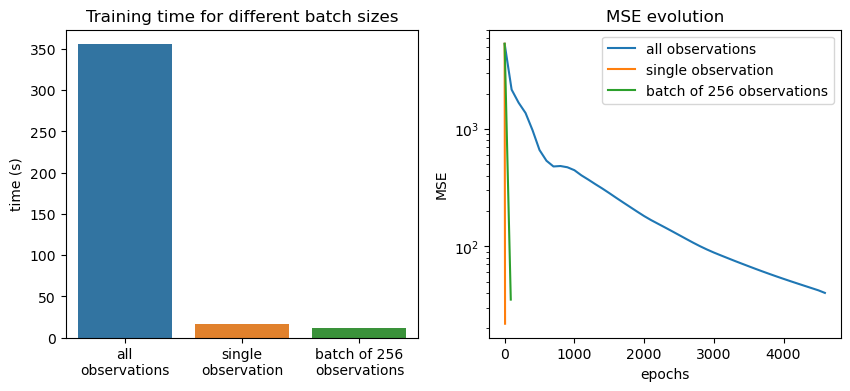

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
batch_size = 256

labels = ["all observations","single observation",f"batch of {batch_size} observations"]

axes[0] = sns.barplot(x=["all\nobservations", "single\nobservation",f"batch of {batch_size}\nobservations"],y=[time1,time2,time3], ax=axes[0])
axes[0].set_title("Training time for different batch sizes")
axes[0].set_ylabel("time (s)")

axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse1)-1)*100+1,100),[epochs1]]),y=mse1,label="all observations") 
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse2)-1)*100+1,100),[epochs2]]),y=mse2,label="single observation")
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse3)-1)*100+1,100),[epochs3]]),y=np.array(mse3),label=f"batch of {batch_size} observations")
axes[1].set_yscale("log")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("MSE")
axes[1].set_title("MSE evolution")

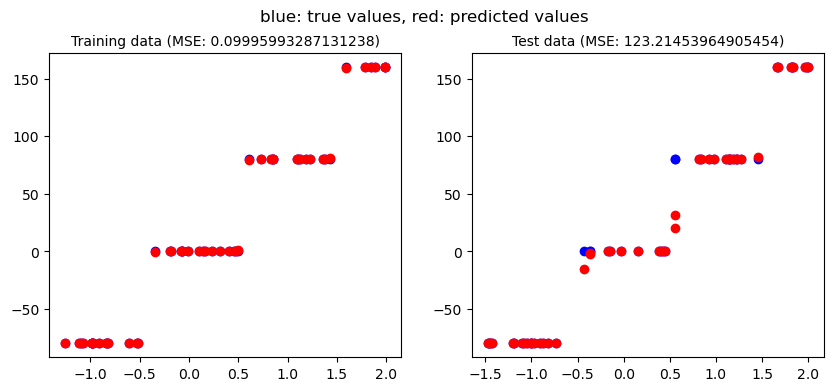

In [2]:
import seaborn as sns
from MLP import *  
df_train = pd.read_csv("data/regression/steps-small-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/steps-small-test.csv",index_col=0)
df_train.head()

mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.01, batch_size=16, loss_stop=0.1)
plot_predictions(mlp, df_train, df_test)

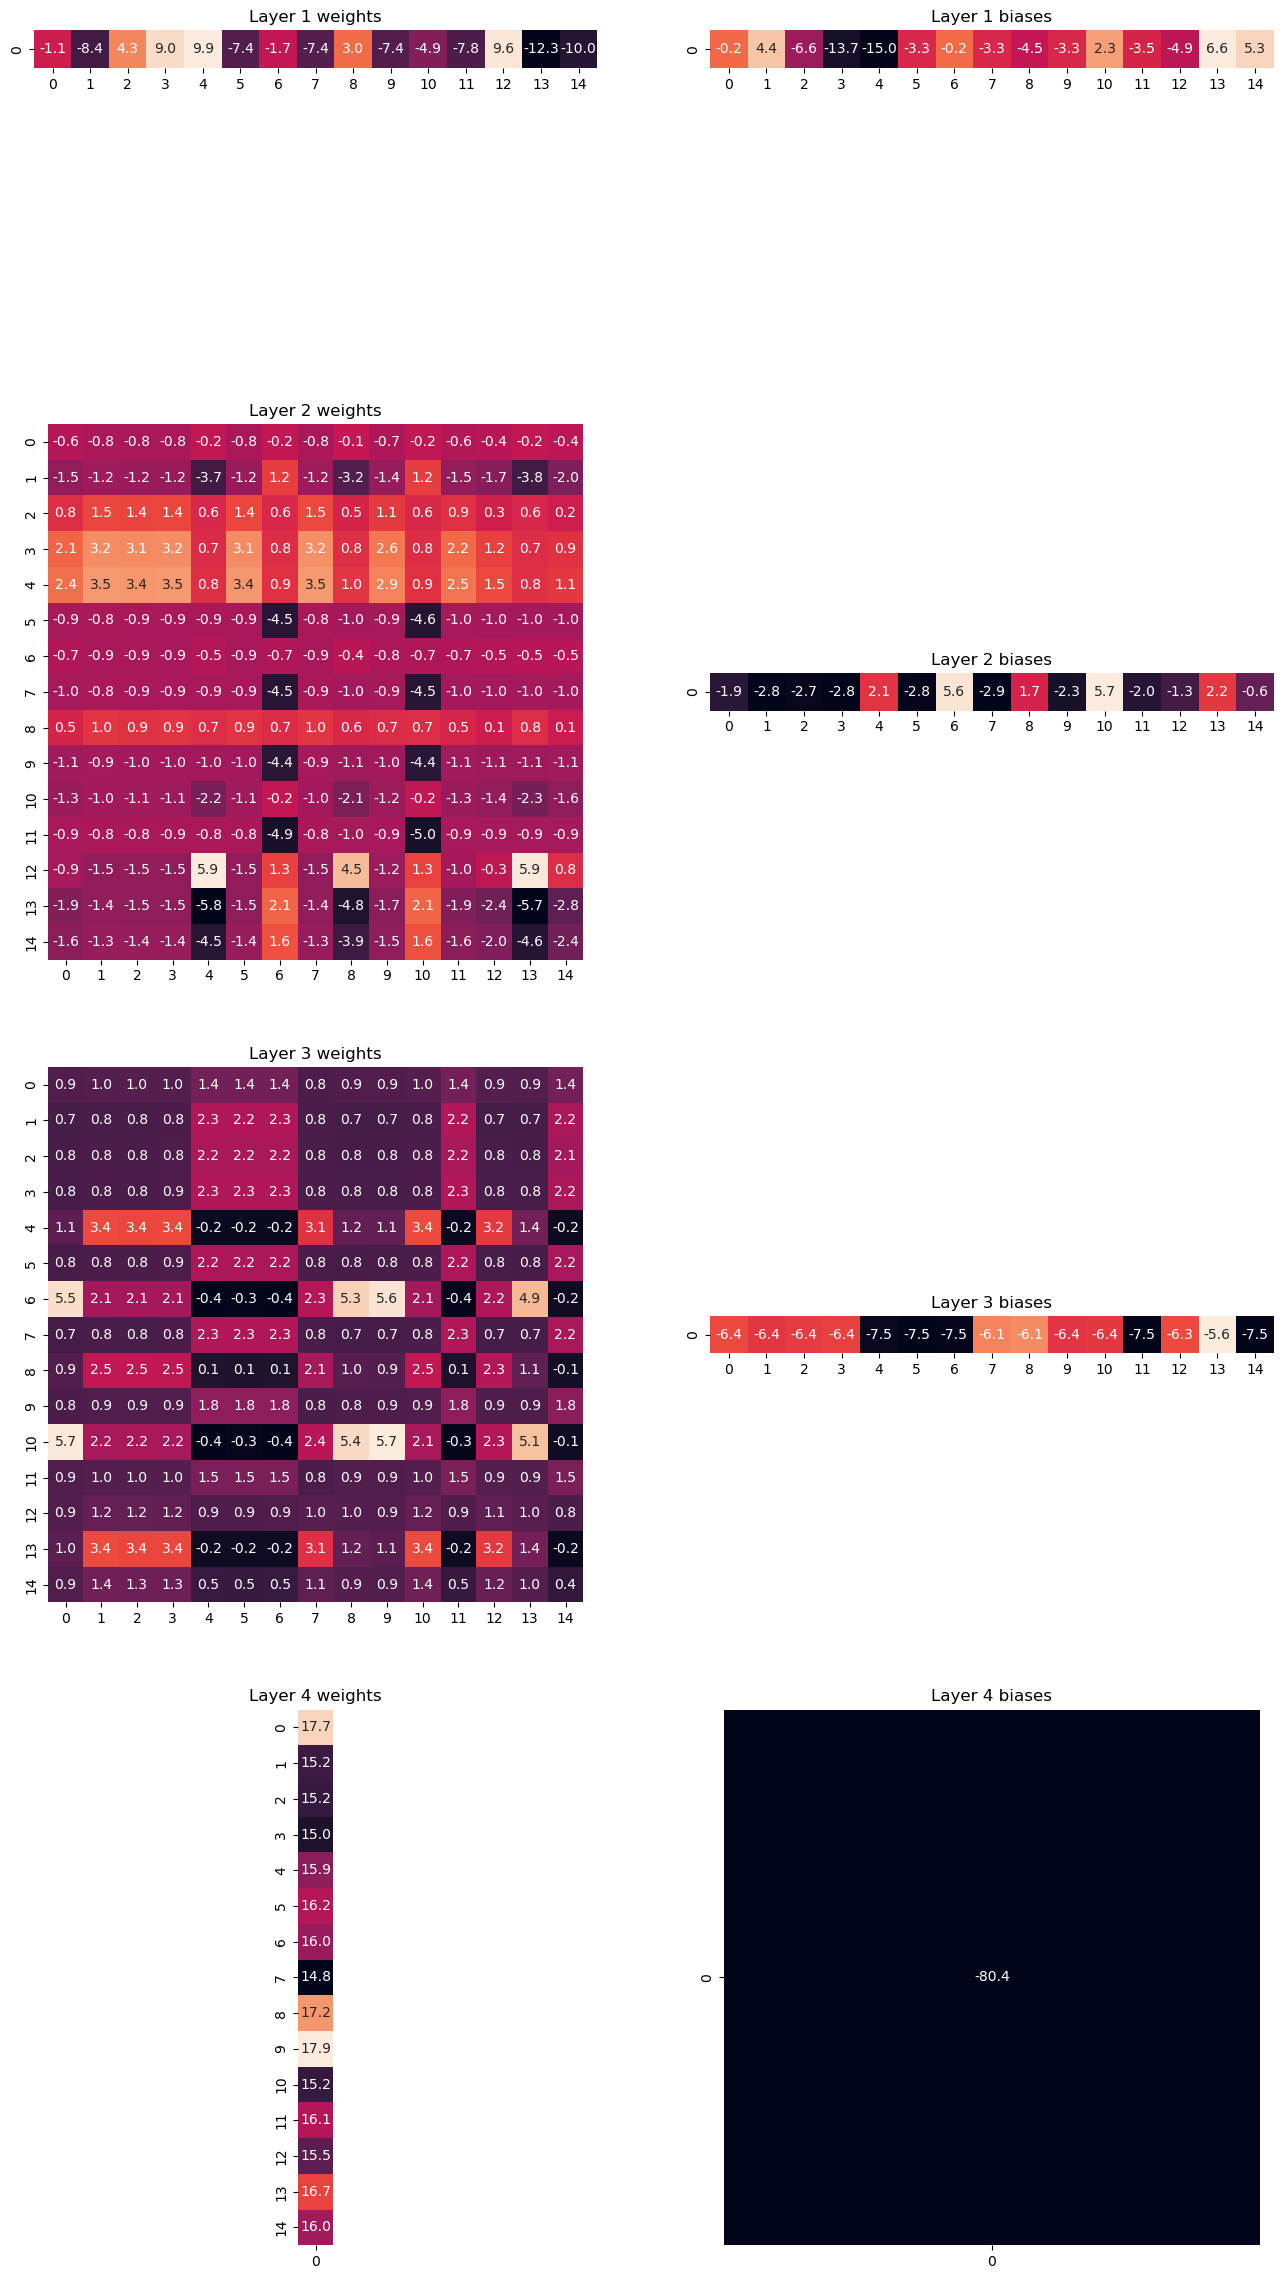

In [4]:
weights = mlp.get_weights()
biases = mlp.get_biases()
len(weights)
fig, axs = plt.subplots(len(weights), 2, figsize=(16, 8*len(weights)))

# plot each layer's weights as a heatmap
for i, (w, b) in enumerate(zip(weights,biases)):
    # plot weights
    sns.heatmap(w, ax=axs[i][0], square=True, annot=True, fmt=".1f", cbar=False)
    axs[i][0].set_title(f"Layer {i+1} weights")
    
    # plot biases
    sns.heatmap(b, ax=axs[i][1], square=True, annot=True, fmt=".1f", cbar=False)
    axs[i][1].set_title(f"Layer {i+1} biases")


# ax[0] = sns.heatmap(weights[0], annot=True, fmt=".1f", cbar=False)
# ax[1] = sns.heatmap(weights[0], annot=True, fmt=".1f", cbar=False)

# ax[1,0] = sns.heatmap(weights[0], annot=True, fmt=".1f")
# ax[1,0] = sns.heatmap(weights[0], annot=True, fmt=".1f")
# ax[1,1] = sns.heatmap(weights[0], annot=True, fmt=".1f")
